# Theory

So far we worked with tabular data. Today we try something different, i.e.,  *image classification*. As a task, we aim to predict *digits* provided by the *MNIST* dataset, a popular dataset used in Machine Learning to test new algorithms. 

We can now import it and see how such digits look like,

In [21]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split

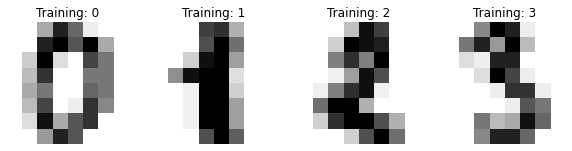

In [22]:
digits = datasets.load_digits()

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)

In [23]:
# Split data into 80% train+validation and 20% test subsets
X_train_val, X_test, y_train_val, y_test = train_test_split(
    digits.data, digits.target, test_size=0.2, shuffle=False
)

# Split the train+validation into 80% train and 20% validation subsets
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=0.2, shuffle=False
)

len(X_train), len(X_val), len(X_test)

(1149, 288, 360)

We can visualize one example --- how a data sample looks like.

In [24]:
X_train[0].shape

(64,)

In [25]:
X_train[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

It's a 1-dimensional array containing 64 integers, each representing the grey value of the corresponding pixel (the images were originally 8x8 pixels, but they have been flattened into a 1-dimensional array to easily use them into the learning algorithms in Sklearn). 
We can thus now think to train an SVM for classifying such digits. 
We use a *polynomial kernel*: $K_{poly}(x_1, x_2) = (x_1^T x_2+e)^d$, where $d$ and $e$ are named *degree* and *coef0* in Sklearn, respectively. The parameter $e$ usually take the values {0,1}, while $d\geq 1$ indicates that we are considering d-tuples of the input elements. When $d=1, e=0$ we get a special case called *linear kernel* (the $\phi()$ corresponding to the linear kernel is $\phi(x)→x$, i.e. the identity function, so we are using the input features as they are). 
We use a *polynomial kernel* with d=2, and we apply a gridsearch over the regularization parameter $C$ (other kernels are described in the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)).

In [26]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, accuracy_score


svc_grid_params = {
    'C': (0.1, 1., 10),
}

#define a new SVC with polynomial kernel (d=2, e=1) and fixed random state
svc_clf = SVC(kernel = 'poly', degree=2, coef0=1) 

#define the gridsearch instance
svc_v1 = GridSearchCV(svc_clf, svc_grid_params, n_jobs= -1, cv = 5)

#fit over the training + validation
svc_v1.fit(X_train_val, y_train_val)

#see the grid-search validation performance 
svc_v1.best_score_

0.968696767324816

Models' performance can be evaluated in many ways. So far, we evaluate a model based on its capabilities at classifing some datapoints (e.g., accuracy score, F1-score). Another option is models training time. In other words, in future, you might choose models you know perform well as accuracy, but also fast at training or prediction time. 

We now want to show you how to calculate the training time performance. 

In [27]:
import time
import numpy as np 

#define the number of repetitions
repetitions = 5

#empty list saving the time
t = []

for _ in range(repetitions): #iterate over the repetitions 
    ## training block
    svc_grid_params = {'C': (0.1, 1., 10)}
    svc_clf = SVC(kernel = 'linear') 
    svc_v1 = GridSearchCV(svc_clf, svc_grid_params, n_jobs= -1, cv = 5)
    start_time = time.time() # get the starting time
    svc_v1.fit(X_train_val, y_train_val)
    end_time = time.time() # get the ending time

    delta = end_time - start_time
    t.append(delta)

np.mean(delta)

0.30063700675964355

On average, it took us between $0.40$ and $0.45$ seconds to train an SVC with linear kernel. Notice that we repeat the training five times and get the average of the execution times because the notebooks are run on a computer in which multiple programs are running simultaneously, therefore each execution could take  different timings (and you might get an average different than ours). 

# Exercises

## Exercise 1: Error Analysis

The role of a data scientist is not only to train models, but also to analyse models' outcomes. 

The *error analysis* is an example of something you should do after training your models. 
With this analysis, your aim is to answer the following question: "why is my model mispredicting some samples?" 

For example, sometimes the errors are legitimate. We are going to see an example now. 

### Exercise 1.1 

Using the dataset adopted during the theoretical part of the lab, select the best hyperparameters for an SVC (SVM for Sklearn) among the followings: 

    - kernel = 'rbf'
    - C = [0.1, 1, 10]

You can use the data splits used in the previous part as well (apply cross validation on train+val).
For the task, use the GridSearchCV with standard parameters as we always did. 

Finally, compute the accuracy on the test set of the selected model. 

In [28]:
## Ex 1.1 here

parameters = {'C': [0.1, 1, 10], 'kernel': ['rbf'], 'gamma': ['scale', 'auto']}
gs = GridSearchCV(SVC(), parameters, cv=5)
gs.fit(X_train_val, y_train_val)
print(gs.best_params_)

best_svm = SVC(C = 10, kernel='rbf', gamma='scale')
best_svm.fit(X_train_val, y_train_val)
best_svm.score(X_test, y_test)

{'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}


0.9583333333333334

Look at the <a href="https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html"> [link] </a>. 
Use the functions described there (specifically in the first example) to create a ConfusionMatrix from the best model you find above over the *test set*.

Do you see any interesting pattern?


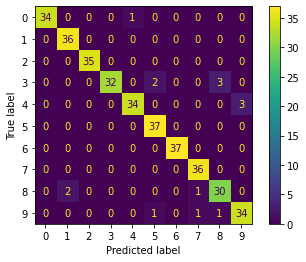

In [29]:
## Ex 1.2 here

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_test_pred = best_svm.predict(X_test)
cm = confusion_matrix(y_test, y_test_pred, labels=best_svm.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_svm.classes_)
disp.plot()
plt.show()

If everything is correct, you should notice that the diagonals contains high values: this is expected, as it means that most of the predictions are correct. 
Another interesting patterns can be found among the mispredictions. There are three examples of class 4 which are predicted as class 9. Let's see how they look like. Run the following code.


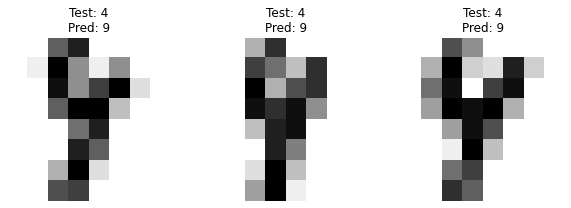

In [30]:
indices = np.all([ (y_test==4), (y_test_pred==9) ], axis=0) # find the index of the examples of class 4 predicted as class 9
                                                            # np.all returns the elements of the input vector that satisfy all conditions 
_, axes = plt.subplots(nrows=1, ncols=sum(indices==True), figsize=(10, 3))
for ax, image, label, pred_label in zip(axes, X_test[indices], y_test[indices], y_test_pred[indices]):
    ax.set_axis_off()
    ax.imshow(image.reshape(8,8), cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Test: %i\nPred: %i" % (label, pred_label))


I could argue that those seem actually 9s instead of 4s, in other words the labels could be noisy. Therefore, I might decide not to spend time improving the performance of the algorithm. These examples could be used when discussing the performance of our learning system with the clients, to say that those are mistakes that even some humans would do (of course we need to check that the same happens for other mistakes). 
In summary, sometimes it is ok to have classifiers that do mistakes if these mistakes "make sense" somehow. 


## Exercise 2: Visualising the Use of Different kernels

Recall that the SVM corresponds to a linear discriminant function in the feature space $\phi$. But how does the discriminat function look back in the input space? In this exercise, we see how does it change for different kernels and parameters. We start as usual by creating a dataset. 

Text(0.5, 1.0, 'Random Classification Data with 2 classes')

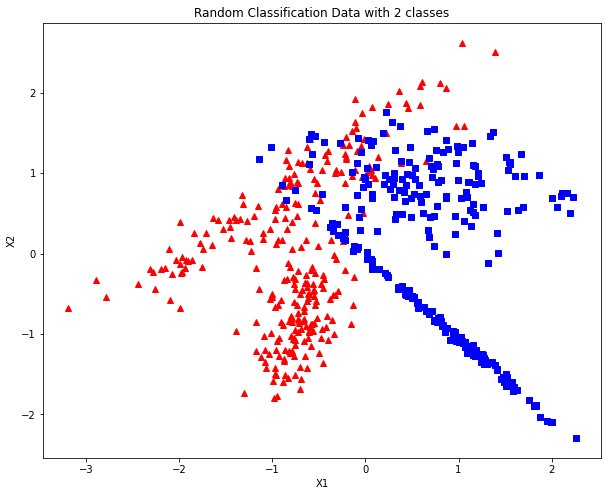

In [31]:
#import the data
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

X, y = datasets.make_classification(n_samples=700, n_features=2, random_state=124, n_redundant= 0, n_informative=2, scale=10, shift=10)
X[:, 0] = X[:, 0]*0.1

# split the data into training, and testing set. 
# note: for this exercise we avoid the validation set since 
# we only aim to understand how different models perform. 
# we do not adopt any validation process
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8)

# scale 
scl = StandardScaler()
scl.fit(X_train)
X_train = scl.transform(X_train)
X_test = scl.transform(X_test)


# visualize the data
fig = plt.figure(figsize=(10,8))
plt.plot(X_train[:, 0][y_train == 0], X_train[:, 1][y_train == 0], 'r^')
plt.plot(X_train[:, 0][y_train == 1], X_train[:, 1][y_train == 1], 'bs')
plt.xlabel("X1")
plt.ylabel("X2")
plt.title('Random Classification Data with 2 classes')


We now create the function that, given a trained model, some data samples $X$, and the ground truth $y$, plots the model decision boundary. 

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


def plot_discriminat_function(X,y, trained_model):
    ## Plotting
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    # h = (x_max / x_min)/100
    # xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # X_plot = np.c_[xx.ravel(), yy.ravel()]
    x_span = np.linspace(x_min, x_max, 100)
    y_span = np.linspace(y_min, y_max, 100)
    xx, yy = np.meshgrid(x_span, y_span)
    X_plot = np.c_[xx.ravel(), yy.ravel()]

    predicted = trained_model.predict(X_plot)
    predicted = predicted.reshape(xx.shape)

    plt.figure(figsize=(15, 5))
    plt.subplot(121)
    plt.contourf(xx, yy, predicted, alpha=0.5)
    plt.set_cmap("gist_rainbow") 
    # plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1)
    plt.plot(X[:, 0][y == 0], X_train[:, 1][y == 0], 'r^')
    plt.plot(X[:, 0][y == 1], X_train[:, 1][y == 1], 'bs')
    
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.xlim(xx.min(), xx.max())
    plt.title(trained_model)
    plt.show()


### Exercise 2.1 

Train an SVM with:


*   kernel = polynomial
*   degree = 1
*   coef0 = 0

Feed the trained model into *plot_discriminat_function*, and visually analze the obtained decision boundary.



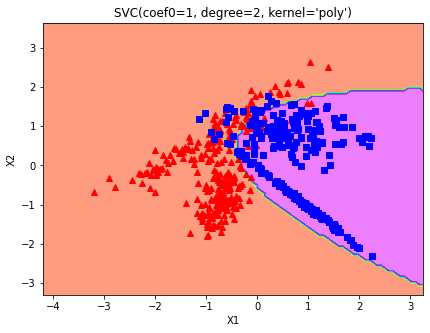

In [33]:
# EX 2.1

svm_model = SVC(kernel='poly', degree=2, coef0=1)
svm_model.fit(X_train, y_train)

plot_discriminat_function(X_train, y_train, svm_model)

You should notice that the discriminant function is not a line in the input space. 

### Exercise 2.2

Let's define now a function that, given a trained model, computes training and testing accuracy.

Then, use this function over the model trained in Exercise 2.1 (previous step).

In [34]:
# EX 2.2

def train_test_accuracy(X_train, y_train, X_test, y_test, trained_model):
  return {'train set accuracy: ': trained_model.score(X_train, y_train), 'test set accuracy: ': trained_model.score(X_test, y_test)}

for k, v in train_test_accuracy(X_train, y_train, X_test, y_test, svm_model).items():
  print(k + str(v))

train set accuracy: 0.9196428571428571
test set accuracy: 0.95


### Exercise 2.3

Repeat the experiment with an SVC (linear kernel) and compare it with the polynomial one in terms of both accuracy (training and testing time) and discriminant function (using the plotting function).


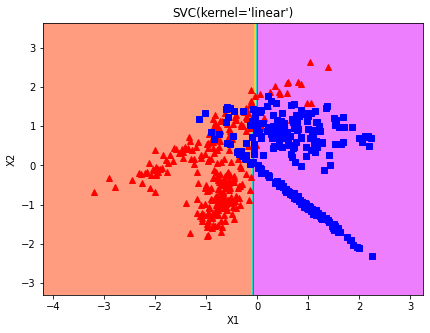

train set accuracy: 0.8821428571428571
test set accuracy: 0.8785714285714286


In [35]:
## EX 2.3

linear_svm = SVC(kernel='linear')
linear_svm.fit(X_train, y_train)
plot_discriminat_function(X_train, y_train, linear_svm)
for k, v in train_test_accuracy(X_train, y_train, X_test, y_test, linear_svm).items():
  print(k + str(v))

### Exercise 2.4

Repeat what done in Exercise 2.3. 
This time, use an RBF kernel at the varying of $\sigma$ = [0.001, 0.1, 10, 100, 500].

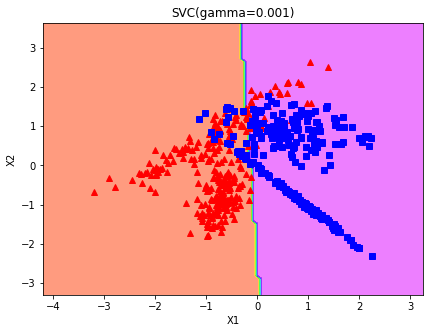

train set accuracy: 0.8839285714285714
test set accuracy: 0.8785714285714286


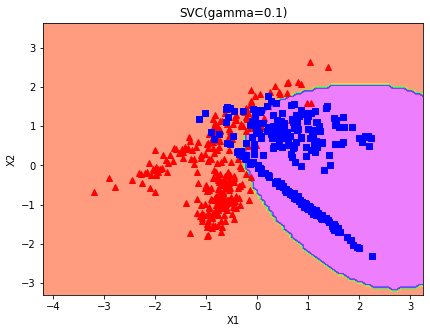

train set accuracy: 0.9107142857142857
test set accuracy: 0.95


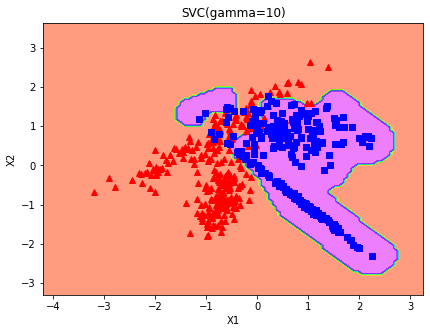

train set accuracy: 0.9482142857142857
test set accuracy: 0.9357142857142857


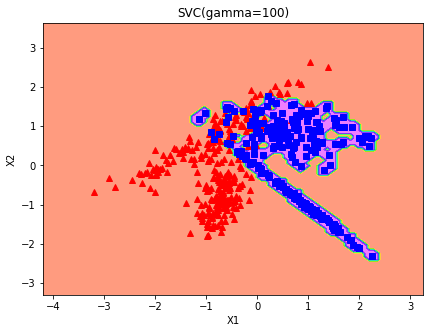

train set accuracy: 0.9678571428571429
test set accuracy: 0.9071428571428571


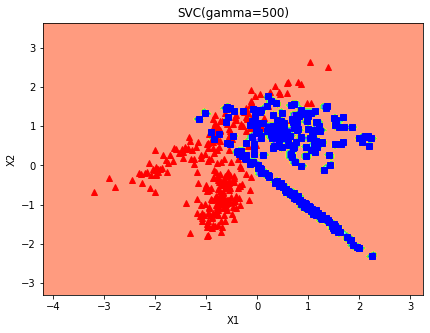

train set accuracy: 0.9910714285714286
test set accuracy: 0.8428571428571429


In [36]:
# EX 2.4 here
gamma_values =  [0.001, 0.1, 10, 100, 500]

for gamma_value in gamma_values:

  rbf_svm = SVC(kernel='rbf', gamma=gamma_value)
  rbf_svm.fit(X_train, y_train)

  plot_discriminat_function(X_train, y_train, rbf_svm)

  for k, v in train_test_accuracy(X_train, y_train, X_test, y_test, rbf_svm).items():
    print(k + str(v))

You should notice that the higher $\sigma$, the better the model over the training data. 

However, the accuracy on the test set does not show the same behaviour: it improves until $\sigma=10$, and then it decreses. With high $\sigma$ values we overfit our data: the decision function tends to coincide with the training examples of the blue class (basically memorizing them). 

## Exercise 3: Comparing the Execution Times of Learning Algorithms

In this exercise, we are going to experiment with the computational cost, i.e. training and prediction time, of different learning algorithms. 

The exercise is conducted over the *MNIST* dataset. Since we are not optimising the hyperparameters of the learning algorithms, but we'll use the default values, we won't create the validation set. 

**ALERT: for this entire exercise, do not set any random_state**

In [37]:
from sklearn.preprocessing import StandardScaler
# Split data into 80% train and 20% test subsets
X_train, X_test, y_train, y_test = train_test_split(
    digits.data, digits.target, test_size=0.2, shuffle=False
)

### scale the data 
scl = StandardScaler().fit(X_train)
X_train_scl = scl.transform(X_train)
X_test_scl = scl.transform(X_test)

num_classes = len(set(y_train))
num_features = X_train.shape[1]

print(f"train size={len(X_train_scl)}, test size={len(X_test_scl)}")
print(f"number of features = {num_features}; number of classes = {num_classes}")

train size=1437, test size=360
number of features = 64; number of classes = 10


### Exercise 3.1: Function for Collecting Stats on Execution Time and Accuracy

Create a function that, given a learning algorithm implemented in Sklearn: 1) train it on the training set; 2) compute predictions over the training and test sets.
The function needs to keep track of the time needed to do training, the time needed to make predictions, the accuracy on the training and test sets. 
 Such values should be defined as the average over 5 executions. 

Specifically, the results should be added to the following lists:

1.   tr_time_list = list containing the training time of a specific model.
2.   te_time_list = list containing the testing time of a specific model; this execution time contains the prediction on both train and test splits. 
3.   tr_acc_list = list containing the training accuracy of a specific model.
4.   te_acc_list = list containing the accuracy on the test set of a specific model.
5.   model_name_list = list containing the model name.

Complete the code below that implement the function described in this box.

In [38]:
## Ex 3.1
from sklearn.linear_model import Perceptron

def test_algorithm(learning_alg, X_train, y_train, X_test, y_test):
  
  #empty list to keep track of the running times and accuracy values of each repetition
  train_time, test_time, train_accuracy, test_accuracy = [], [], [], [] 

  for i in range(5):

    start_time = time.time()
    learning_alg.fit(X_train, y_train)
    end_time = time.time()
    train_time.append(end_time - start_time)

    start_time = time.time()
    y_train_pred = learning_alg.predict(X_train)
    y_test_pred = learning_alg.predict(X_test)
    end_time = time.time()
    test_time.append(end_time - start_time)
    
    train_accuracy.append(accuracy_score(y_train, y_train_pred))
    test_accuracy.append(accuracy_score(y_test, y_test_pred))

  return np.mean(train_time), np.mean(test_time), np.mean(train_accuracy), np.mean(test_accuracy)

# You can test your function by invoking it as follows
clf = Perceptron()
train_time, test_time, train_accuracy, test_accuracy = test_algorithm(clf, X_train_scl, y_train, X_test_scl, y_test)
print(f"Perceptron\n   Training time: {train_time}\n   Prediction time: {test_time}")
print(f"   Accuracy on train: {train_accuracy}\n   Accuracy on test {test_accuracy}")

Perceptron
   Training time: 0.05108156204223633
   Prediction time: 0.0008677959442138672
   Accuracy on train: 0.9832985386221293
   Accuracy on test 0.8916666666666668


### Exercise 3.2 

Now use the function test_algorithm() implemented in the previous exercise to collect statistics over the following algorithms: 

1. Perceptron
2. Logistic Regression
3. SVM with linear kernel
4. SVM with polynomial kernel of degree 2
5. SVM with polynomial kernel of degree 3
6. Decision Tree using Entropy for splitting
7. K-NN with K=3

The statistics must be collected in the lists: tr_time_list, te_time_list, tr_acc_list, te_acc_list, model_name_list, which are defined in the previuos exercise. In order to reduce your waiting time, you might want to use more than one cell, even one per algorithm. 

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

#initialize the lists collecting the stats
tr_time_list, te_time_list, tr_acc_list, te_acc_list, model_name_list = [], [], [], [], []

model_name_list.append("Perceptron")
train_time, test_time, train_accuracy, test_accuracy = test_algorithm(Perceptron(), X_train_scl, y_train, X_test_scl, y_test)
tr_time_list.append(train_time)
te_time_list.append(test_time); 
tr_acc_list.append(train_accuracy)
te_acc_list.append(test_accuracy)

model_name_list.append("Logistic Regression")
train_time, test_time, train_accuracy, test_accuracy = test_algorithm(LogisticRegression(), X_train_scl, y_train, X_test_scl, y_test)
tr_time_list.append(train_time)
te_time_list.append(test_time); 
tr_acc_list.append(train_accuracy)
te_acc_list.append(test_accuracy)

model_name_list.append("SVM Linear Kernel")
train_time, test_time, train_accuracy, test_accuracy = test_algorithm(SVC(kernel="linear"), X_train_scl, y_train, X_test_scl, y_test)
tr_time_list.append(train_time)
te_time_list.append(test_time); 
tr_acc_list.append(train_accuracy)
te_acc_list.append(test_accuracy)

model_name_list.append("SVM Polynomial Kernel d=2")
train_time, test_time, train_accuracy, test_accuracy = test_algorithm(SVC(kernel="poly", degree=2), X_train_scl, y_train, X_test_scl, y_test)
tr_time_list.append(train_time)
te_time_list.append(test_time); 
tr_acc_list.append(train_accuracy)
te_acc_list.append(test_accuracy)

model_name_list.append("SVM Polynomial Kernel d=3")
train_time, test_time, train_accuracy, test_accuracy = test_algorithm(SVC(kernel="poly", degree=3), X_train_scl, y_train, X_test_scl, y_test)
tr_time_list.append(train_time)
te_time_list.append(test_time); 
tr_acc_list.append(train_accuracy)
te_acc_list.append(test_accuracy)

model_name_list.append("Decision Tree")
train_time, test_time, train_accuracy, test_accuracy = test_algorithm(DecisionTreeClassifier(criterion='entropy'), X_train_scl, y_train, X_test_scl, y_test)
tr_time_list.append(train_time)
te_time_list.append(test_time); 
tr_acc_list.append(train_accuracy)
te_acc_list.append(test_accuracy)

model_name_list.append("KNN with K = 3")
train_time, test_time, train_accuracy, test_accuracy = test_algorithm(KNeighborsClassifier(n_neighbors=3), X_train_scl, y_train, X_test_scl, y_test)
tr_time_list.append(train_time)
te_time_list.append(test_time); 
tr_acc_list.append(train_accuracy)
te_acc_list.append(test_accuracy)

for i in range(len(model_name_list)):
  print(f"{model_name_list[i]}\n   Training time: {tr_time_list[i]}\n   Prediction time: {te_time_list[i]}")
  print(f"   Accuracy on train: {tr_acc_list[i]}\n   Accuracy on test {te_acc_list[i]}")

Perceptron
   Training time: 0.04430136680603027
   Prediction time: 0.0007573127746582031
   Accuracy on train: 0.9832985386221293
   Accuracy on test 0.8916666666666668
Logistic Regression
   Training time: 0.2264495849609375
   Prediction time: 0.0008120536804199219
   Accuracy on train: 1.0
   Accuracy on test 0.8972222222222224
SVM Linear Kernel
   Training time: 0.027051115036010744
   Prediction time: 0.030619096755981446
   Accuracy on train: 1.0
   Accuracy on test 0.9277777777777778
SVM Polynomial Kernel d=2
   Training time: 0.05375094413757324
   Prediction time: 0.05977973937988281
   Accuracy on train: 0.9958246346555324
   Accuracy on test 0.9416666666666667
SVM Polynomial Kernel d=3
   Training time: 0.11249361038208008
   Prediction time: 0.10585136413574218
   Accuracy on train: 0.9846903270702854
   Accuracy on test 0.9027777777777779
Decision Tree
   Training time: 0.0876431941986084
   Prediction time: 0.0028921127319335937
   Accuracy on train: 1.0
   Accuracy on 

### Visualising the Results

We can now visualise the results obtained. Remember that here, each of the five lists must contain 7 values. Double check it: if you have more, you might have re-executed a cell multiple times. If so, just re-execute the entire notebook. 

In [43]:
#this cell checks if you have the right amount of info 
expected_list_length = 7
assert len(tr_acc_list) == expected_list_length
assert len(te_acc_list) == expected_list_length
assert len(tr_time_list) == expected_list_length
assert len(te_time_list) == expected_list_length
assert len(model_name_list) == expected_list_length

Text(0, 0.5, 'Training Time [s]')

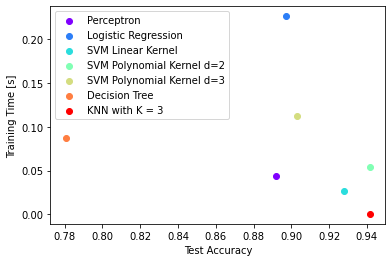

In [44]:
import matplotlib.cm as cm
colors = cm.rainbow(np.linspace(0, 1, len(model_name_list)))
for x, y, c, m in zip(te_acc_list, tr_time_list, colors, model_name_list):
    plt.scatter(x, y, color = c, label = m)
plt.legend()
plt.xlabel("Test Accuracy")
plt.ylabel("Training Time [s]")


Text(0, 0.5, 'Prediction Time [s]')

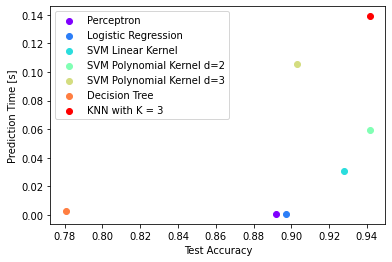

In [45]:
import matplotlib.cm as cm
colors = cm.rainbow(np.linspace(0, 1, len(model_name_list)))
for x, y, c, m in zip(te_acc_list, te_time_list, colors, model_name_list):
    plt.scatter(x, y, color = c, label = m)
plt.legend()
plt.xlabel("Test Accuracy")
plt.ylabel("Prediction Time [s]")


## Exercise 3.3
Compute the same stats (training and prediction time, accuracies) for the following Neural Network (assuming the size of the input vectors is n)
*   One hidden layer, with 2*n nodes, each with relu activation
*   A second hidden layer, with n/2 nodes, each with relu activation
*   One output layer made of as many nodes as the classes of the task, with softmax activation
*   Use cross entropy as loss and sgd as optimiser; use 20% of the training set as validation and apply early stopping with patience 3; train for 300 epochs.  

Do not forget to turn the gold labels y_train and y_test into one hot encoding. 

Repeat the runs 5 times. Record the training and test time, as well as the accuracies on test into the following lists.
```
train_time, test_time, train_accuracy, test_accuracy
``` 
In order to have a different model each run, remember to redefine the model for each of the 5 runs (i.e. inside the for loop). 

In [46]:
# EX 3.3

from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.python.framework.random_seed import set_random_seed
from keras.callbacks import EarlyStopping

np.random.seed(5)
set_random_seed(42)

train_time, test_time, train_accuracy, test_accuracy = [],[],[],[]

y_train_cat = to_categorical(y_train, num_classes)
y_test_cat = to_categorical(y_test, num_classes)

early_stopping = EarlyStopping(monitor='val_loss', mode='min', patience = 3, verbose=2)

for i in range(5):

  model = Sequential(
      [
            Dense(input_dim = num_features, units=2.0 * num_features, activation='relu'),
            Dense(input_dim = num_features, units=num_features / 2.0, activation='relu'),
            Dense(num_classes, activation='softmax')
      ]
  )  
  model.compile(loss='categorical_crossentropy', optimizer="sgd", metrics=['accuracy'])

  start_time = time.time() 
  history = model.fit(X_train_scl, y_train_cat, epochs=300, verbose=2, validation_split = 0.2, callbacks=[early_stopping])
  end_time = time.time() 
  train_time.append(end_time - start_time)
  
  start_time = time.time()
  train_accuracy.append(model.evaluate(X_train_scl, y_train_cat, verbose=0)[1])
  test_accuracy.append(model.evaluate(X_test_scl, y_test_cat, verbose=0)[1])
  end_time = time.time() 
  test_time.append(end_time - start_time)

model.summary()
print("Average Model Test Accuracy: %.4f%%" % (np.mean(test_accuracy)))

Epoch 1/300
36/36 - 3s - loss: 2.2728 - accuracy: 0.1662 - val_loss: 2.0645 - val_accuracy: 0.3125 - 3s/epoch - 74ms/step
Epoch 2/300
36/36 - 0s - loss: 1.8980 - accuracy: 0.4117 - val_loss: 1.7635 - val_accuracy: 0.4201 - 99ms/epoch - 3ms/step
Epoch 3/300
36/36 - 0s - loss: 1.6007 - accuracy: 0.5587 - val_loss: 1.4975 - val_accuracy: 0.5625 - 102ms/epoch - 3ms/step
Epoch 4/300
36/36 - 0s - loss: 1.3402 - accuracy: 0.6754 - val_loss: 1.2634 - val_accuracy: 0.6597 - 105ms/epoch - 3ms/step
Epoch 5/300
36/36 - 0s - loss: 1.1163 - accuracy: 0.7380 - val_loss: 1.0687 - val_accuracy: 0.7326 - 114ms/epoch - 3ms/step
Epoch 6/300
36/36 - 0s - loss: 0.9333 - accuracy: 0.7815 - val_loss: 0.9133 - val_accuracy: 0.7535 - 100ms/epoch - 3ms/step
Epoch 7/300
36/36 - 0s - loss: 0.7880 - accuracy: 0.8216 - val_loss: 0.7900 - val_accuracy: 0.8056 - 112ms/epoch - 3ms/step
Epoch 8/300
36/36 - 0s - loss: 0.6736 - accuracy: 0.8564 - val_loss: 0.6927 - val_accuracy: 0.8438 - 102ms/epoch - 3ms/step
Epoch 9/300

Let's check the stats we got.

In [47]:
print(train_accuracy)
print(test_accuracy)
print(train_time)
print(test_time)
print("\nDifference between fastest and shortest training times:", max(train_time)-min(train_time))
print("Difference bwteen best and worst test results:", max(test_accuracy)-min(test_accuracy))

[0.9923451542854309, 0.9895615577697754, 0.9923451542854309, 0.9937369227409363, 0.9909533858299255]
[0.9138888716697693, 0.9027777910232544, 0.9138888716697693, 0.9055555462837219, 0.8888888955116272]
[16.82681441307068, 27.90407943725586, 25.85173487663269, 16.011414766311646, 19.758110284805298]
[0.3469986915588379, 0.35683274269104004, 15.689566135406494, 0.29703450202941895, 1.4042677879333496]

Difference between fastest and shortest training times: 11.892664670944214
Difference bwteen best and worst test results: 0.02499997615814209


Notice that the early stopping influences the training times. We found 11.4 seconds difference on our runs (114 iterations difference) between the fastest and slowest one.

The training and test accuracies also vary a quite a bit. Specifically, there is 2.5% difference between the best and worst accuracy values on the test set. This is not uncommon, especially as the number of layers/parameters of the network increases. So, whenever the computational resources allows it, test a neural network on multiple runs using a different random seed each time, then report mean and variance. This is to rule out the chance that the performance you get is only due to a lucky choice of the random seed. 
